# **[필수과제2]**
- label 긍정&부정, 빈도수 많은 단어 확인
- 문자열 split
- 리뷰 길이에 따른 긍정&부정, 빈도수 많은 단어 확인

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movie_rv.csv')
df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [3]:
df['document'] = df['document'].str.strip()
df['document'] = df['document'].str.replace(r'[^\uAC00-\uD7A30-9a-zA-Z\s]', '')

<ipython-input-3-6d00fa2b5842>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace(r'[^\uAC00-\uD7A30-9a-zA-Z\s]', '')


In [4]:
df['document'].head(10)

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
5                막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화별반개도 아까움
6                                 원작의 긴장감을 제대로 살려내지못했다
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9            왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나
Name: document, dtype: object

## 긍정 / 부정

In [5]:
doc_p = [] # 긍정
doc_n = [] # 부정

In [6]:
for index, label in enumerate(df['label']):
  if label == 1:
    doc_p.append(df['document'][index])
  if label == 0:
    doc_n.append(df['document'][index])

In [7]:
print(doc_p[:3])
print(doc_n[:3])

['흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나', '사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '액션이 없는데도 재미 있는 몇안되는 영화']
['아 더빙 진짜 짜증나네요 목소리', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 솔직히 재미는 없다평점 조정']


In [8]:
df_p = pd.DataFrame(doc_p)
df_n = pd.DataFrame(doc_n)

In [9]:
df_p.head()

,0
0,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
2,액션이 없는데도 재미 있는 몇안되는 영화
3,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나
4,걍인피니트가짱이다진짜짱이다


In [10]:
df_n.head()

,0
0,아 더빙 진짜 짜증나네요 목소리
1,너무재밓었다그래서보는것을추천한다
2,교도소 이야기구먼 솔직히 재미는 없다평점 조정
3,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화별반개도 아까움
4,원작의 긴장감을 제대로 살려내지못했다


In [11]:
df_p.rename(columns={0: 'positive'}, inplace=True)
df_n.rename(columns={0: 'negative'}, inplace=True)

In [12]:
df_p.head()

,positive
0,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
2,액션이 없는데도 재미 있는 몇안되는 영화
3,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나
4,걍인피니트가짱이다진짜짱이다


In [13]:
df_n.head()

,negative
0,아 더빙 진짜 짜증나네요 목소리
1,너무재밓었다그래서보는것을추천한다
2,교도소 이야기구먼 솔직히 재미는 없다평점 조정
3,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화별반개도 아까움
4,원작의 긴장감을 제대로 살려내지못했다


In [14]:
df_p_split = df_p['positive'].str.split(' ', expand=True)
df_p_split

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,흠포스터보고,초딩영화줄오버연기조차,가볍지,않구나,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,사이몬페그의,익살스런,연기가,돋보였던,영화스파이더맨에서,늙어보이기만,했던,커스틴,던스트가,너무나도,...,None,None,None,None,None,None,None,None,None,None
2,액션이,없는데도,재미,있는,몇안되는,영화,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,왜케,평점이,낮은건데,꽤,볼만한데,헐리우드식,화려함에만,너무,길들여져,있나,...,None,None,None,None,None,None,None,None,None,None
4,걍인피니트가짱이다진짜짱이다,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74822,httpblognavercomoroblast220215679580,나쁜,인상은,아니지만오랫동안,기억에,남아종종,떠올라서조금은,사람을,피곤하게,만드는,...,None,None,None,None,None,None,None,None,None,None
74823,For,Carl칼,세이건으로,시작해서,칼,세이건으로,끝난다,None,None,None,...,None,None,None,None,None,None,None,None,None,None
74824,디케이드,다음에,더블,다음에,오즈인데,더블은,조금밖에,안나오네요,None,None,...,None,None,None,None,None,None,None,None,None,None
74825,평점이,너무,낮아서,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
df_p_split = pd.DataFrame(df_p_split.stack(dropna=True)).reset_index()

In [16]:
df_p_split = df_p_split.drop(['level_0','level_1'], axis=1)

In [17]:
df_p_split

,0
0,흠포스터보고
1,초딩영화줄오버연기조차
2,가볍지
3,않구나
4,사이몬페그의
...,...
561764,영화의
561765,최고봉방황과
561766,우울했던
561767,날들의


In [19]:
df_p_count = pd.DataFrame(df_p_split.value_counts())
df_p_count

,0
0,
,10109
영화,9791
정말,5425
너무,4377
진짜,2995
...,...
방이고뭐고,1
방은진의,1
방은진도,1


## 긍정 리뷰

---



In [20]:
df_p['len_words'] = df_p['positive'].str.len()

<Axes: xlabel='len_words', ylabel='Count'>

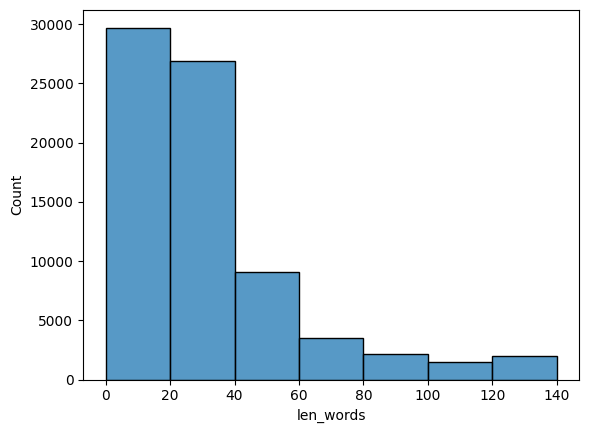

In [21]:
sns.histplot(x = df_p['len_words'], bins=7)

### 긍정 리뷰 길이 40 이하

In [22]:
df_p_split_under40 =df_p[df_p['len_words'] <= 40]['positive'].str.split(' ', n=10, expand=True)
df_p_split_under40

,0,1,2,3,4,5,6,7,8,9,10
0,흠포스터보고,초딩영화줄오버연기조차,가볍지,않구나,None,None,None,None,None,None,None
2,액션이,없는데도,재미,있는,몇안되는,영화,None,None,None,None,None
4,걍인피니트가짱이다진짜짱이다,None,None,None,None,None,None,None,None,None,None
5,볼때마다,눈물나서,죽겠다90년대의,향수자극허진호는,감성절제멜로의,달인이다,None,None,None,None,None
7,냥,매번,긴장되고,재밋음,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
74821,재미있어요,None,None,None,None,None,None,None,None,None,None
74823,For,Carl칼,세이건으로,시작해서,칼,세이건으로,끝난다,None,None,None,None
74824,디케이드,다음에,더블,다음에,오즈인데,더블은,조금밖에,안나오네요,None,None,None
74825,평점이,너무,낮아서,None,None,None,None,None,None,None,None


In [23]:
df_p_split_under40 = pd.DataFrame(df_p_split_under40.stack(dropna=True)).reset_index()

In [24]:
df_p_split_under40 = df_p_split_under40.drop(['level_0','level_1'], axis=1)
df_p_split_under40

,0
0,흠포스터보고
1,초딩영화줄오버연기조차
2,가볍지
3,않구나
4,액션이
...,...
277987,영화의
277988,최고봉방황과
277989,우울했던
277990,날들의


In [25]:
df_p_under40 = pd.DataFrame(df_p_split_under40.value_counts())
df_p_under40.head(10)

,0
0,
,7277
영화,6496
정말,3145
너무,2433
진짜,1879
최고의,1469
이,1171
최고,1131
잘,881


### 긍정 리뷰 길이 40 초과

In [26]:
df_p_split_over40 =df_p[df_p['len_words'] > 40]['positive'].str.split(' ', n=20, expand=True)
df_p_split_over40

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,사이몬페그의,익살스런,연기가,돋보였던,영화스파이더맨에서,늙어보이기만,했던,커스틴,던스트가,너무나도,...,None,None,None,None,None,None,None,None,None,None
3,왜케,평점이,낮은건데,꽤,볼만한데,헐리우드식,화려함에만,너무,길들여져,있나,...,None,None,None,None,None,None,None,None,None,None
6,담백하고,깔끔해서,좋다,신문기사로만,보다,보면,자꾸,잊어버린다,그들도,사람이었다는,...,None,None,None,None,None,None,None,None,None,None
8,참,사람들,웃긴게,바스코가,이기면,락스코라고,까고바비가,이기면,아이돌이라고,깐다그냥,...,안달난것처럼,보인다,None,None,None,None,None,None,None,None
9,이건,정말,깨알,캐스팅과,질퍽하지않은,산뜻한,내용구성이,잘,버무러진,깨알일드,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74804,전개과정,긴장감,신선,튼튼,후반힘풀림,결론,재밌을수잇는,마무리를,허무하게,풀이,...,None,None,None,None,None,None,None,None,None,None
74807,성룡의진중하고,무게있는,연기가,참좋다,신주쿠대병소장베스트키드스파이넥스트도어샤오린신해혁명차이니즈조디악폴리스스토리2014등,드디어,환갑이지만,장르를,넘나드는,그의,...,계속기대되고,궁금하다,성룡,당신은최고입니다,None,None,None,None,None,None
74813,명감독의,지휘,아래,카리스마,빛나는,당대,톱배우들의,암살,대결이,흥미롭게,...,None,None,None,None,None,None,None,None,None,None
74816,그리,만족스럽진못했어도,7점은,나와야되는것같아,10점줌,주인공들연기도,훌륭했고,내용도,이정도면,괜찮았다,...,그저,진부한영화가,되버릴뻔,그래도,엔딩이,섭섭한건,없지않아있었음,킬러들의도시도그렇고,콜린파렐을,너무 축축하게 끝내버리는듯


In [27]:
df_p_split_over40 = pd.DataFrame(df_p_split_over40.stack(dropna=True)).reset_index()

In [28]:
df_p_split_over40 = df_p_split_over40.drop(['level_0','level_1'], axis=1)
df_p_split_over40

,0
0,사이몬페그의
1,익살스런
2,연기가
3,돋보였던
4,영화스파이더맨에서
...,...
257303,사람을
257304,피곤하게
257305,만드는
257306,영화


In [29]:
df_p_over40 = pd.DataFrame(df_p_split_over40.value_counts())
df_p_over40.head(10)

,0
0,
영화,2939
,2381
정말,2060
너무,1761
이,1469
진짜,1042
수,1001
잘,939
더,908


## 부정 리뷰

---



In [30]:
df_n['len_words'] = df_n['negative'].str.len()

<Axes: xlabel='len_words', ylabel='Count'>

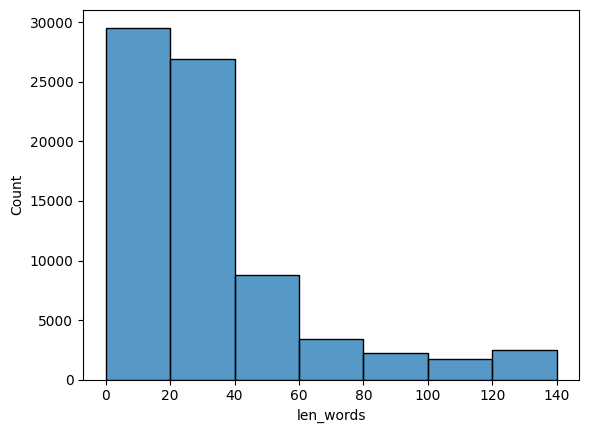

In [31]:
sns.histplot(x = df_n['len_words'], bins = 7)

### 부정 리뷰 길이 40 이하

In [33]:
df_n_split_under40 =df_n[df_n['len_words'] <= 40]['negative'].str.split(' ', n=10, expand=True)

In [34]:
df_n_split_under40 = pd.DataFrame(df_n_split_under40.stack(dropna=True)).reset_index()

In [35]:
df_n_split_under40 = df_n_split_under40.drop(['level_0','level_1'], axis=1)
df_n_split_under40

,0
0,아
1,더빙
2,진짜
3,짜증나네요
4,목소리
...,...
278060,최초로
278061,수간하는
278062,내용이
278063,담긴


In [36]:
df_n_under40 = pd.DataFrame(df_n_split_under40.value_counts())
df_n_under40.head(10)

,0
0,
,6201
영화,4987
너무,2036
진짜,1691
정말,1369
그냥,1229
왜,1212
이,1048
이런,1011


### 부정 리뷰 길이 40 초과

In [37]:
df_n_split_over40 =df_n[df_n['len_words'] > 40]['negative'].str.split(' ', n=10, expand=True)

In [38]:
df_n_split_over40 = pd.DataFrame(df_n_split_over40.stack(dropna=True)).reset_index()

In [39]:
df_n_split_over40 = df_n_split_over40.drop(['level_0','level_1'], axis=1)
df_n_split_over40

,0
0,별
1,반개도
2,아깝다
3,욕나온다
4,이응경
...,...
186086,크리쳐개그물임
186087,음악
186088,완전
186089,흥겹다


In [40]:
df_n_over40 = pd.DataFrame(df_n_split_over40.value_counts())
df_n_over40.head(10)

,0
0,
영화,1784
,1439
너무,1146
진짜,1021
정말,798
이,777
그냥,711
왜,670
이런,601
